<a href="https://colab.research.google.com/github/mfathul21/loan-prediction/blob/main/Loan_Prediction_Based_on_Customers_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Prediction Based on Customers Behaviour

## Domain Project

Dalam industri keuangan, khususnya pada perusahaan pemberi pinjaman, manajemen risiko kredit adalah aspek yang sangat penting. Salah satu risiko utama yang dihadapi oleh perusahaan pemberi pinjaman adalah risiko kredit, yaitu kemungkinan bahwa peminjam gagal membayar pinjamannya. Ketika seorang peminjam gagal membayar (default), ini tidak hanya berdampak buruk pada keuangan perusahaan, tetapi juga dapat mengganggu proses bisnis dan menurunkan kepuasan pelanggan.

Proses manual dalam menilai dan menyetujui aplikasi pinjaman sering kali memakan waktu yang lama dan tidak efisien. Hal ini dapat mengakibatkan penundaan dalam memberikan keputusan pinjaman kepada pelanggan, yang pada gilirannya dapat memengaruhi kepuasan pelanggan dan memperlambat aliran kas perusahaan.

Untuk mengatasi tantangan ini, diperlukan suatu sistem yang dapat memprediksi dengan tepat dan cepat peminjam mana yang berpotensi gagal membayar dan peminjam mana yang layak untuk diberikan pinjaman. Dengan demikian, perusahaan dapat meningkatkan tingkat pengembalian pinjaman (repayment rate) dan mengoptimalkan proses persetujuan pinjaman.

## Business Understanding

**Problem Statement**

1. Bagaimana memahami perilaku dan preferensi pelanggan yang *good borrower* (kecil probabilitas default) dan *bad borrower* (besar probabilitas default)
2. Bagaimana mengurangi risiko kredit akibat tingginya jumlah peminjam yang gagal bayar?
3. Bagaimana mempercepat proses penilaian dan persetujuan pinjaman untuk meningkatkan efisiensi operasional dan kepuasan pelanggan?

**Tujuan Proyek**

1. Memahami Perilaku Pelanggan:
   - Mengembangkan model prediktif untuk mengidentifikasi *good borrowers* dan *bad borrowers* melalui analisis data pelanggan.

2. Mengurangi Risiko Kredit:
   - Mengurangi tingkat gagal bayar sebesar 20% dalam satu tahun dengan menggunakan penilaian risiko yang lebih akurat.

3. Meningkatkan Efisiensi dan Kepuasan Pelanggan:
   - Mengotomatisasi proses penilaian kredit, mengurangi waktu persetujuan pinjaman dari 7 hari menjadi kurang dari 24 jam.
   - Meningkatkan kepuasan pelanggan sebesar 15% dalam enam bulan setelah implementasi.

## Data Understanding

Data yang Anda gunakan pada proyek kali ini adalah ["Loan Prediction Based on Customers Behaviour"](https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior?select=Training+Data.csv) yang diunduh dari Kaggle API. Untuk tahap training, dapat dilakukan hanya dari file "Training Data.csv" yang akan displit kembali untuk menjadi data train dan test pada tahap modelling. Selain itu, dataset ini juga cukup bersih sehingga tidak terlalu banyak memerlukan proses data cleaning.

Dataset ini memiliki 252000 baris dengan 13 fitur, yang terdiri fitur non-numerik seperti Married/Single, House_Ownership, Car_Ownership, Profession, CITY, dan STATE, serta fitur numerik seperti Id, Income, Age, Experience, CURRENT_JOB_YRS, CURRENT_HOUSE_YRS, dan Risk_Flag. Fitur-fitur ini adalah fitur yang akan Anda gunakan dalam menemukan pola pada data untuk memprediksi fitur target yaitu Risk_Flag.

## Data Loading

### Download datasets from Kaggle to Google Colab

In [1]:
# !pip install nbformat==5.10.4 -q
# !pip install nbconvert==7.16.1 -q
!pip install kaggle -q
!pip install shap -q

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadfathul","key":"86f7af68314a74218ed685350e322691"}'}

In [3]:
import json
import os

# Check if the Kaggle API configuration directory exists, and if not, create it.
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')

# Move the uploaded Kaggle JSON file to the configuration directory.
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Set the permissions for the Kaggle JSON file.
os.chmod('/root/.kaggle/kaggle.json', 600)

In [4]:
!kaggle datasets download -d subhamjain/loan-prediction-based-on-customer-behavior

Dataset URL: https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior
License(s): other
  0% 0.00/5.15M [00:00<?, ?B/s]
100% 5.15M/5.15M [00:00<00:00, 56.2MB/s]


In [5]:
!unzip -q loan-prediction-based-on-customer-behavior.zip

### Import Datasets

In [23]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

sns.set_style('whitegrid')

In [8]:
df = pd.read_csv('Training Data.csv')
df.sample(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
157955,157956,1707111,53,5,single,rented,no,Geologist,Kochi,Kerala,5,12,0
225152,225153,7651476,43,0,married,rented,no,Technology_specialist,Gudivada,Andhra_Pradesh,0,11,0
58247,58248,6284059,45,4,single,norent_noown,no,Software_Developer,Ulhasnagar,Maharashtra,4,11,0
98165,98166,2522353,71,17,married,rented,no,Hotel_Manager,Bidhannagar,West_Bengal,13,11,0
221625,221626,2057666,57,1,single,rented,no,Civil_engineer,Arrah,Bihar,1,11,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


## Exploratory Data Analysis (EDA)

Some questions:

1. Bagaimana distribusi pendapatan (income) dari pengguna dalam dataset ini?
2. Bagaimana distribusi usia (age) dari pengguna dalam dataset ini?
3. Apa rata-rata pengalaman profesional (experience) dari pengguna dalam dataset ini?
4. Berapa persentase pengguna yang sudah menikah (married) dan yang masih lajang (single)?
5. Bagaimana persebaran kepemilikan rumah (house_ownership) di antara pengguna? Apakah mayoritas dari mereka memiliki rumah, menyewa, atau tidak memiliki?
6. Berapa persentase pengguna yang memiliki kepemilikan mobil (car_ownership)?
7. Apa profesi (profession) yang paling umum di antara pengguna dalam dataset ini?
8. Apa kota (city) dengan jumlah pengguna terbanyak?
9. Apakah terdapat perbedaan signifikan dalam tingkat risiko kredit (risk_flag) antara pengguna yang memiliki mobil dengan yang tidak?
10. Apakah ada korelasi antara usia pengguna dan risiko kredit?
11. Apakah pengalaman profesional (experience) berhubungan dengan risiko kredit yang diambil oleh pengguna?
12. Apakah durasi tinggal di rumah saat ini (current_house_yrs) mempengaruhi risiko kredit?
13. Bagaimana distribusi risiko kredit di berbagai profesi (profession)?
14. Apakah ada korelasi antara usia (age) dan pendapatan (income) dari pengguna?
15. Apakah ada perbedaan dalam tingkat risiko kredit antara pengguna yang tinggal di kota-kota berbeda (city)?

In [16]:
df.columns = [x.lower() for x in df.columns.to_list()]
df.columns

Index(['id', 'income', 'age', 'experience', 'married/single',
       'house_ownership', 'car_ownership', 'profession', 'city', 'state',
       'current_job_yrs', 'current_house_yrs', 'risk_flag'],
      dtype='object')

### Features Description

Berdasarkan informasi dari Kaggle, fitur-fitur pada Travel Insurance dataset adalah sebagai berikut:

- `id` - Id of user
- `income` - Income of the user
- `age` - Age of the user
- `experience` - Professional experience of the user in years
- `married/single` - Whether married or single
- `house_ownership` - Owned or rented or neither
- `car_ownership` - Does the person own a car
- `profession` - Profession
- `city` - City of residence
- `state` - State of residence
- `current_job` - Years of experience in the current job
- `current_house_yrs` - Number of years in the current residence
- `risk_flag` - Defaulted on a loan

### Data Analysis

In [24]:
def currency_formatter(x):
    if x >= 1e6:
        return '{:1.1f}M'.format(x * 1e-6)
    elif x >= 1e3:
        return '{:1.0f}k'.format(x * 1e-3)
    else:
        return '{:1.0f}'.format(x)

formatter = FuncFormatter(currency_formatter)

In [33]:
df.describe()

,id,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


Dari hasil fungsi `.describe()`, tidak ditemukan informasi yang anomali atau ambigu. Berikut adalah informasi yang dapat disimpulkan:

- Pendapatan(income): Rata-rata pendapatan pelanggan adalah Rs5.000.000 dengan rentang Rs10.000an - Rs9.900.000an serta median yang tidak jauh berbeda dengan rata-rata tersebut sehingga mengindikasikan tidak adanya outlier pada data ini.
- Usia (age): Rata-rata usia pelanggan adalah sekitar 49 tahun, dengan rentang usia antara 21 hingga 79 tahun.
- Pengalaman (experience): Rentang pengalaman yang dimiliki oleh pelanggan adalah 0 - 20 tahun dengan rata-rata 10 tahun.
- Lama di pekerjaan saat ini (current_job_yrs): Rentang dalam pengalaman kerja saat ini adalah 0 - 14 tahun dengan rata-rata 6 tahun.
- Lama di rumah saat ini (current_house_yrs): Pelanggan cenderung tinggal di rumah mereka selama 10 hingga 14 tahun.    
- Gagal membayar pinjaman (risk_flag): Terdapat dua nilai yaitu 0 untuk pelanggan yang tidak mengalami defaul sedangkan 1 untuk pelanggan yang mengalami atau pernah default.

In [35]:
df.describe(include='O')

,married/single,house_ownership,car_ownership,profession,city,state
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


- Status (married/single): Mayoritas pelanggan adalah yang masih lajang (single).
- Kepemilikan rumah (house_ownership): Mayoritas pelanggan memiliki rumah dalam status sewa (rented).
- Kepemilikan mobil (car_ownership): Mayoritas pelanggan tidak memiliki mobil.
- Pekerjaan (profession): Pekerjaan yang paling umum di antara pelanggan adalah fisikawan.
- Kota (city): Mayoritas pelanggan berasal dari kota Vijayanagaram.
- Wilayah (state): Mayoritas pelanggan berasal dari wilayah Uttar Pradesh.

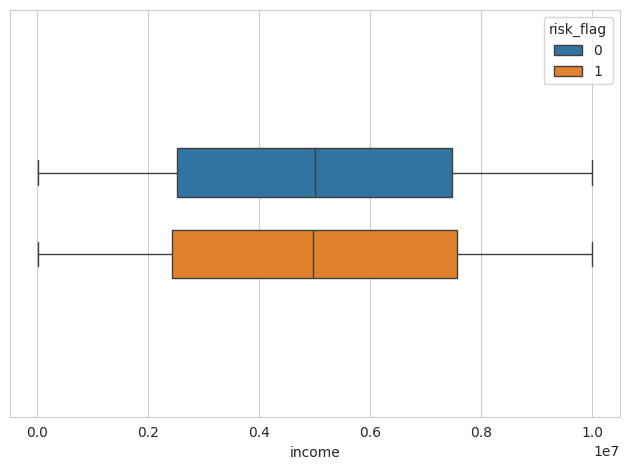

In [54]:
sns.boxplot(x='income', hue='risk_flag', width=0.4, gap=0.4, data=df)
plt.tight_layout()
plt.show()

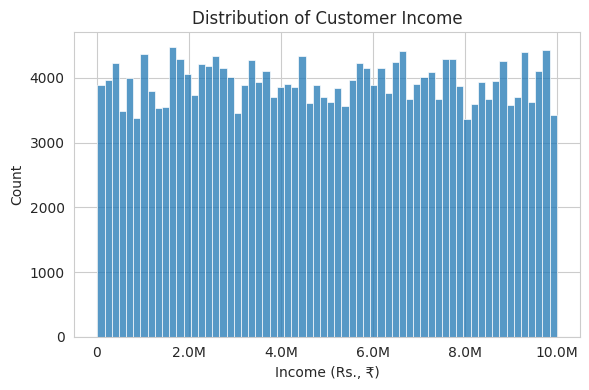

In [36]:
plt.figure(figsize=(6,4))

ax = sns.histplot(x='income', data=df)
ax.xaxis.set_major_formatter(formatter)
plt.title('Distribution of Customer Income')
plt.xlabel('Income (Rs., ₹)')

plt.tight_layout()
plt.show()

Distribusi pendapatan pelanggan terdistribusi secara merata.

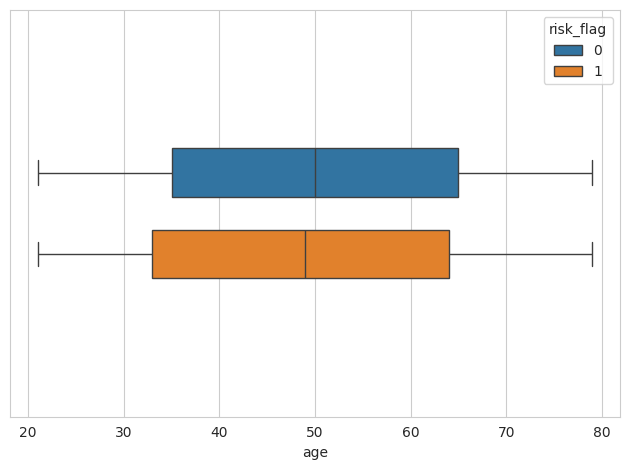

In [55]:
sns.boxplot(x='age', hue='risk_flag', width=0.4, gap=0.4, data=df)
plt.tight_layout()
plt.show()

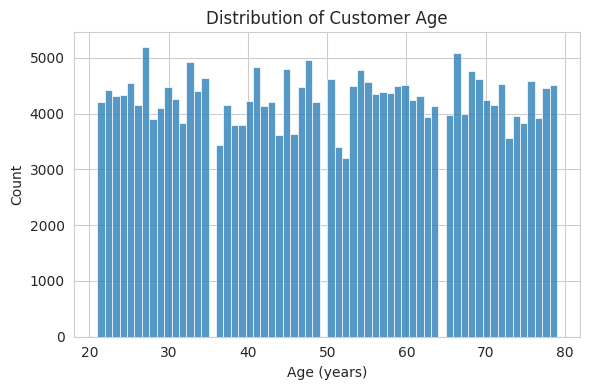

In [29]:
plt.figure(figsize=(6,4))

sns.histplot(x='age', data=df)
plt.title('Distribution of Customer Age')
plt.xlabel('Age (years)')

plt.tight_layout()
plt.show()

Distribusi usia pelanggan dalam rentang 20-80 tahun terdistribusi secara merata.

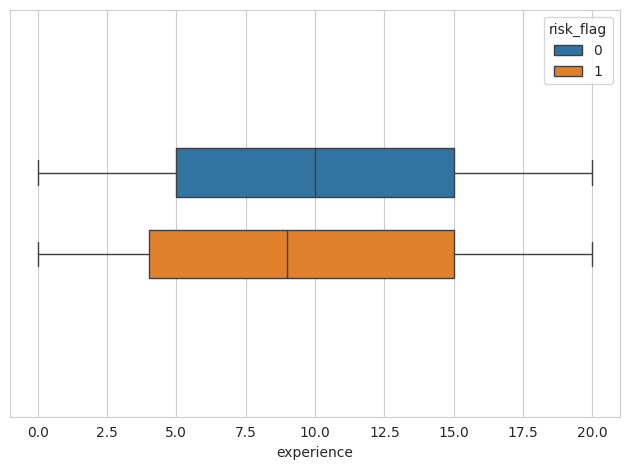

In [56]:
sns.boxplot(x='experience', hue='risk_flag', width=0.4, gap=0.4, data=df)
plt.tight_layout()
plt.show()

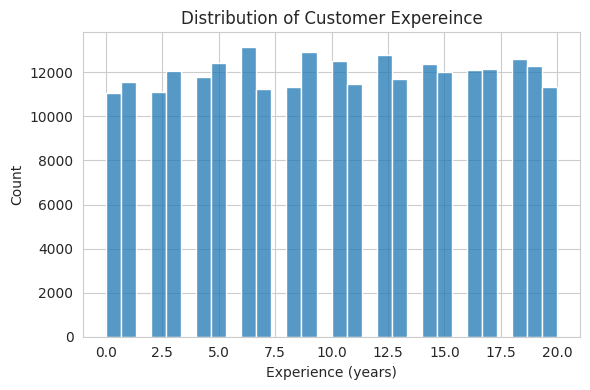

In [74]:
plt.figure(figsize=(6,4))

sns.histplot(x='experience', bins=30, data=df)
plt.title('Distribution of Customer Experience')
plt.xlabel('Experience (years)')

plt.tight_layout()
plt.show()

Perhatikan, pelanggan memiliki pengalaman kerja yang merata dalam rentang 0 hingga 20 tahun.

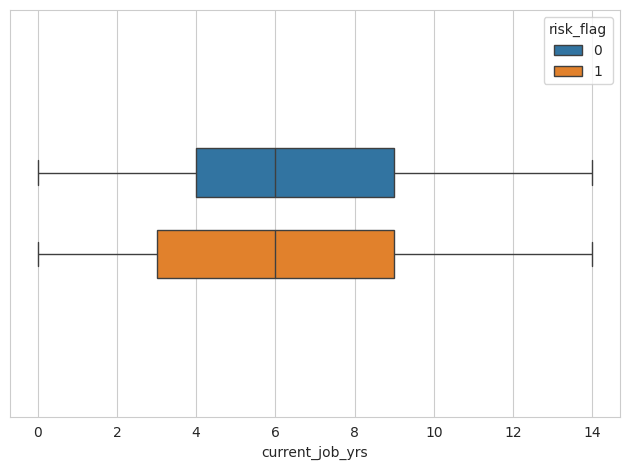

In [64]:
sns.boxplot(x='current_job_yrs', hue='risk_flag', width=0.4, gap=0.4, data=df)
plt.tight_layout()
plt.show()

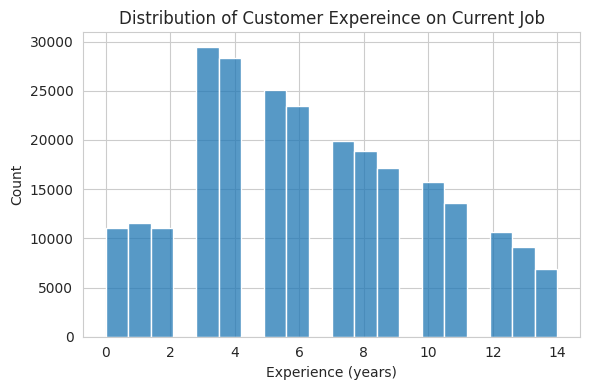

In [63]:
plt.figure(figsize=(6,4))

sns.histplot(x='current_job_yrs', bins=20, data=df)
plt.title('Distribution of Customer Experience on Current Job')
plt.xlabel('Experience (years)')

plt.tight_layout()
plt.show()

Untuk lama di pekerjaan saat ini, mayoritas pelanggan memiliki pengalaman sekitar 4 hingga 5 tahun.

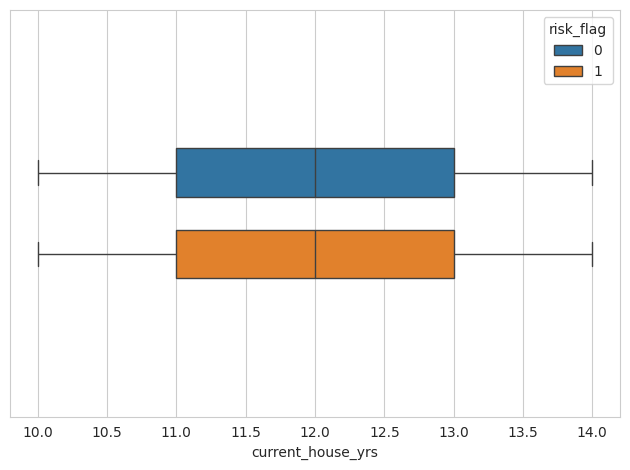

In [66]:
sns.boxplot(x='current_house_yrs', hue='risk_flag', width=0.4, gap=0.4, data=df)
plt.tight_layout()
plt.show()

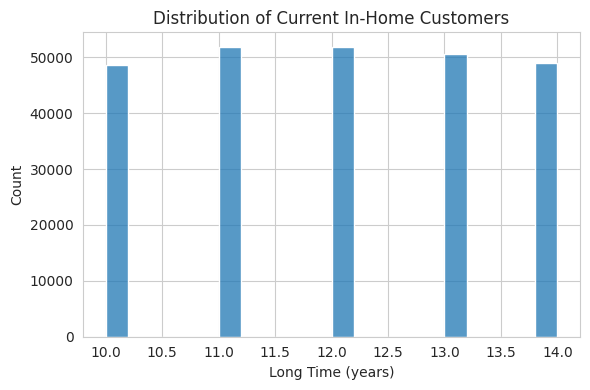

In [69]:
plt.figure(figsize=(6,4))

sns.histplot(x='current_house_yrs', bins=20, data=df)
plt.title('Distribution of Current In-Home Customers')
plt.xlabel('Long Time (years)')

plt.tight_layout()
plt.show()